In [ ]:
# Import library
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

In [ ]:
# Load dataset
train_data = pd.read_csv("train (2).csv", header=0, sep=';')
test_data = pd.read_csv("test (1).csv", header=0, sep=';')
eval_data = pd.read_csv("evaluation.csv", header=0, sep=';')

In [ ]:
# Pisahkan fitur teks dan label untuk data train, test, dan evaluasi
X_train = train_data['text']
y_train = train_data['label']

X_test = test_data['text']
y_test = test_data['label']

X_eval = eval_data['text']
y_eval = eval_data['label']

In [ ]:
# Transformasi fitur teks menjadi numerik menggunakan TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)
X_eval_vect = vectorizer.transform(X_eval)

In [ ]:
# Label Encoding untuk label
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_eval_encoded = label_encoder.transform(y_eval)

In [ ]:
# Membuat dan melatih model Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vect, y_train_encoded)

MultinomialNB()

In [ ]:
# Melakukan prediksi pada data test
y_test_pred = nb_model.predict(X_test_vect)

# Evaluasi model pada data test
print("Evaluation on Test Data:")
print(classification_report(y_test_encoded, y_test_pred))
print("Accuracy Score on Test Data:")
print(accuracy_score(y_test_encoded, y_test_pred))

Evaluation on Test Data:
              precision    recall  f1-score   support

           0       0.94      0.87      0.91      3753
           1       0.90      0.96      0.92      4364

    accuracy                           0.92      8117
   macro avg       0.92      0.91      0.92      8117
weighted avg       0.92      0.92      0.92      8117

Accuracy Score on Test Data:
0.916348404582974


In [ ]:
# Melakukan prediksi pada data evaluasi
y_eval_pred = nb_model.predict(X_eval_vect)

# Evaluasi model pada data evaluasi
print("Evaluation on Evaluation Data:")
print(classification_report(y_eval_encoded, y_eval_pred))
print("Accuracy Score on Evaluation Data:")
print(accuracy_score(y_eval_encoded, y_eval_pred))

Evaluation on Evaluation Data:
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      3803
           1       0.89      0.95      0.92      4314

    accuracy                           0.91      8117
   macro avg       0.91      0.91      0.91      8117
weighted avg       0.91      0.91      0.91      8117

Accuracy Score on Evaluation Data:
0.9103116915116423


In [ ]:
y_eval_prob = nb_model.predict_proba(X_eval_vect)
cross_entropy_loss = log_loss(y_eval_encoded, y_eval_prob)
print("Cross-Entropy Loss:", cross_entropy_loss)

Cross-Entropy Loss: 0.22962727369807565


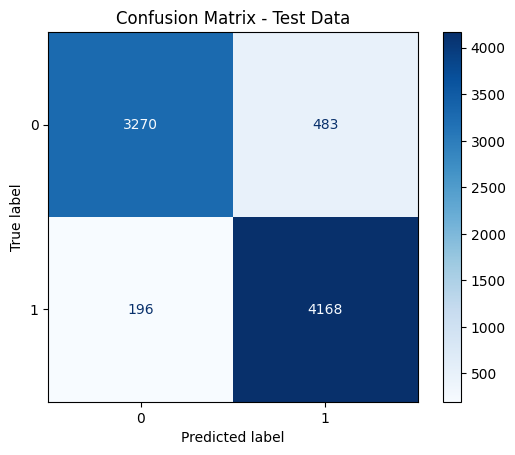

In [ ]:
# Plot Confusion Matrix untuk Test Data
conf_matrix_test = confusion_matrix(y_test_encoded, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test, display_labels=label_encoder.classes_)
disp_test.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Test Data")
plt.show()

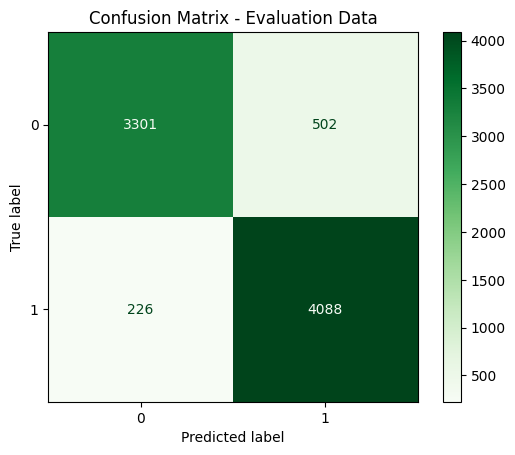

In [ ]:
# Plot Confusion Matrix untuk Evaluasi Data
conf_matrix_eval = confusion_matrix(y_eval_encoded, y_eval_pred)
disp_eval = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_eval, display_labels=label_encoder.classes_)
disp_eval.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix - Evaluation Data")
plt.show()

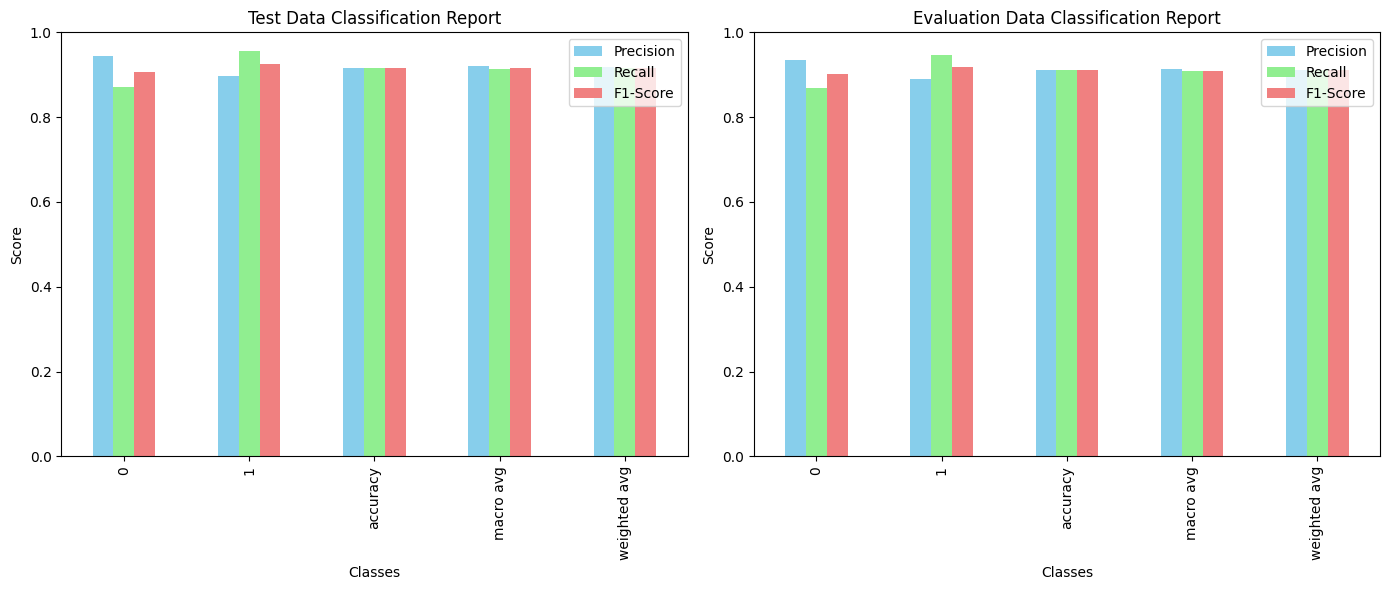

In [ ]:
# Membuat grafik classification report untuk Test Data
report_test = classification_report(y_test_encoded, y_test_pred, output_dict=True)
report_eval = classification_report(y_eval_encoded, y_eval_pred, output_dict=True)

# Mengonversi hasil classification report ke dalam DataFrame untuk visualisasi
df_test = pd.DataFrame(report_test).transpose()
df_eval = pd.DataFrame(report_eval).transpose()

# Membuat grafik perbandingan precision, recall, f1-score
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Test Data
df_test.drop(['support'], axis=1, inplace=True)
df_test.plot(kind='bar', ax=ax[0], color=['skyblue', 'lightgreen', 'lightcoral'])
ax[0].set_title("Test Data Classification Report")
ax[0].set_ylabel("Score")
ax[0].set_xlabel("Classes")
ax[0].set_ylim(0, 1)
ax[0].legend(["Precision", "Recall", "F1-Score"])

# Evaluation Data
df_eval.drop(['support'], axis=1, inplace=True)
df_eval.plot(kind='bar', ax=ax[1], color=['skyblue', 'lightgreen', 'lightcoral'])
ax[1].set_title("Evaluation Data Classification Report")
ax[1].set_ylabel("Score")
ax[1].set_xlabel("Classes")
ax[1].set_ylim(0, 1)
ax[1].legend(["Precision", "Recall", "F1-Score"])

plt.tight_layout()
plt.show()